
# Problem Statement





Build a machine learning system that predicts whether a product is recommended or not based on customer review text.

*TItle: Women’s Clothing E-Commerce Reviews – Recommendation Prediction*

Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Loading the dataset**

In [3]:
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv",index_col=0)
print("Data Set loaded Sucessfully")

Data Set loaded Sucessfully


In [4]:
# Quick Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
#Preview of the data
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
#To get the maximum width of the column
import pandas as pd
pd.set_option("display.max_colwidth", None)


In [7]:
df["Review Text"]

,Review Text
0,Absolutely wonderful - silky and sexy and comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
...,...
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.
23482,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok."
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great."
23484,"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"


Drop the unwanted columns to get the good accuracy

In [8]:
df=df.drop(columns=['Clothing ID','Age','Title','Rating','Positive Feedback Count','Division Name','Department Name','Class Name'])

In [9]:
#After dropping the unwanted columns these are the reqiured columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 550.5+ KB


In [10]:
# To check the distribution of the target variable
df["Recommended IND"].value_counts()

,count
Recommended IND,
1,19314
0,4172


Basic data Inspection

In [11]:
print("Shape of the data:",df.shape)
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Columns of the dataset:",df.columns)
print("Missing Values:",df.isnull().sum())
print("Drop the missing values:",df.dropna(inplace=True))
print("Duplicate Values:",df.duplicated().sum())
print("Drop the duplicate values:",df.drop_duplicates(inplace=True))
print("After Inspection data preview:",df.info())
print("Basic data Inspection is done successfully")

Shape of the data: (23486, 2)
Number of rows: 23486
Number of columns: 2
Columns of the dataset: Index(['Review Text', 'Recommended IND'], dtype='object')
Missing Values: Review Text        845
Recommended IND      0
dtype: int64
Drop the missing values: None
Duplicate Values: 7
Drop the duplicate values: None
<class 'pandas.core.frame.DataFrame'>
Index: 22634 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22634 non-null  object
 1   Recommended IND  22634 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.5+ KB
After Inspection data preview: None
Basic data Inspection is done successfully


**Exploratory Data Analysis (EDA)**

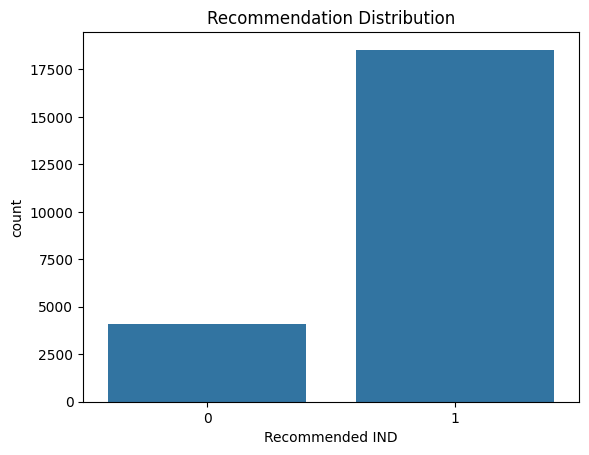

In [12]:
# Target distribution
sns.countplot(x='Recommended IND', data=df)
plt.title("Recommendation Distribution")
plt.show()

Observations:The data is biased toward one class, I handle it using resampling techniques like class_weights=balanced to improve the accuracy.”

Cleaning the input text data

In [13]:
import nltk
import re
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean_text(doc):
  # doc is a string of text
  # Let's define a regex to match special characters and digits
  regex = "[^a-zA-Z.]"
  doc=re.sub(regex," ",doc)
  # Convert to lower case
  doc = doc.lower()
  # Tokenization
  tokens=nltk.word_tokenize(doc)
  # Stop word removal
  stop_words=set(stopwords.words("english"))
  filtered_tokens=[word for word in tokens if word not in stop_words]
  # Lemmatize
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
  # Join and return
  return " ".join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [31]:
# import nltk
# import re
# nltk.download("punkt")
# nltk.download("punkt_tab")
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# def clean(texts):
#     stop_words = set(stopwords.words('english'))
#     lemmatizer = WordNetLemmatizer()
#     cleaned_texts = []

#     for doc in texts:
#         doc = re.sub(r"[^a-zA-Z\s]", "", doc)
#         doc = doc.lower()
#         tokens = nltk.word_tokenize(doc)
#         tokens = [w for w in tokens if w not in stop_words]
#         tokens = [lemmatizer.lemmatize(w) for w in tokens]
#         cleaned_texts.append(" ".join(tokens))

#     return cleaned_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#Creates a new column by filling missing review text with empty strings and applying a text-cleaning function to each review.
df["cleaned_review_text"]=df["Review Text"].fillna('').apply(clean_text)

In [15]:
#Re-maps binary numeric target values into human-readable category labels using conditional indexing.
df.loc[df["Recommended IND"] == 0,"Recommended IND"] = "Not Recommended"
df.loc[df["Recommended IND"] == 1,"Recommended IND"] = "Recommended"

/tmp/ipython-input-2661270399.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Recommended' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Recommended IND"] == 0,"Recommended IND"] = "Not Recommended"


In [16]:
# Assiging input feature to x and target featue to y
x=df["cleaned_review_text"]
y=df["Recommended IND"]

In [17]:
x.head()

,cleaned_review_text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty . happened find store glad bc never would ordered online bc petite . bought petite . love length hit little knee . would definitely true midi someone truly petite .
2,high hope dress really wanted work . initially ordered petite small usual size found outrageously small . small fact could zip reordered petite medium ok. overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer . imo major design flaw net layer sewn directly zipper c
3,love love love jumpsuit . fun flirty fabulous every time wear get nothing great compliment
4,shirt flattering due adjustable front tie . perfect length wear legging sleeveless pair well cardigan . love shirt


In [18]:
y.head()

,Recommended IND
0,Recommended
1,Recommended
2,Not Recommended
3,Recommended
4,Recommended


Splitting the data into train and text

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18107,)
(4527,)
(18107,)
(4527,)


In [21]:
#Common Evaluation Function for all models
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("Classification report:\n",classification_report(y_test, y_pred))


Logistic Regression

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(
        class_weight='balanced'))])
# Train the model
lr_pipeline.fit(x_train, y_train)
# Evaluate the model
print(evaluate_model(lr_pipeline, x_test, y_test))



Accuracy Score: 0.8679036889772477
Confusion matrix:
 [[ 709  134]
 [ 464 3220]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.60      0.84      0.70       843
    Recommended       0.96      0.87      0.92      3684

       accuracy                           0.87      4527
      macro avg       0.78      0.86      0.81      4527
   weighted avg       0.89      0.87      0.88      4527

None


In [28]:
lr_pipeline.predict(["I like this product very well amazing but bad"	])

array(['Not Recommended'], dtype=object)

Observation:Logistic Model Predicting Correctly

KNN Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())])
# Train the model
knn_pipeline.fit(x_train, y_train)
# Evaluate the model
print(evaluate_model(knn_pipeline, x_test, y_test))

Accuracy Score: 0.8418378617185774
Confusion matrix:
 [[ 235  608]
 [ 108 3576]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.69      0.28      0.40       843
    Recommended       0.85      0.97      0.91      3684

       accuracy                           0.84      4527
      macro avg       0.77      0.62      0.65      4527
   weighted avg       0.82      0.84      0.81      4527

None


Naive Bayes Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
# Train the model
nb_pipeline.fit(x_train, y_train)
# Evaluate the model
evaluate_model(nb_pipeline, x_test, y_test)


Accuracy Score: 0.8221780428539872
Confusion matrix:
 [[  40  803]
 [   2 3682]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.95      0.05      0.09       843
    Recommended       0.82      1.00      0.90      3684

       accuracy                           0.82      4527
      macro avg       0.89      0.52      0.50      4527
   weighted avg       0.85      0.82      0.75      4527



Decision Tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])
# Train the model
dt_pipeline.fit(x_train, y_train)
# Evaluate the model
evaluate_model(dt_pipeline, x_test, y_test)


Accuracy Score: 0.8075988513364258
Confusion matrix:
 [[ 400  443]
 [ 428 3256]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.48      0.47      0.48       843
    Recommended       0.88      0.88      0.88      3684

       accuracy                           0.81      4527
      macro avg       0.68      0.68      0.68      4527
   weighted avg       0.81      0.81      0.81      4527



Support Vector Machine

In [37]:
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('SVC', SVC(class_weight='balanced'))
])
# Train the model
svm_pipeline.fit(x_train, y_train)
# Evaluate the model
evaluate_model(svm_pipeline, x_test, y_test)


Accuracy Score: 0.8910978573006406
Confusion matrix:
 [[ 615  228]
 [ 265 3419]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.70      0.73      0.71       843
    Recommended       0.94      0.93      0.93      3684

       accuracy                           0.89      4527
      macro avg       0.82      0.83      0.82      4527
   weighted avg       0.89      0.89      0.89      4527



Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('RFC', RandomForestClassifier(class_weight='balanced'))])
# Train the model
rf_pipeline.fit(x_train, y_train)
#Evaluate the model
evaluate_model(rf_pipeline, x_test, y_test)


Accuracy Score: 0.8550916721890877
Confusion matrix:
 [[ 219  624]
 [  32 3652]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.87      0.26      0.40       843
    Recommended       0.85      0.99      0.92      3684

       accuracy                           0.86      4527
      macro avg       0.86      0.63      0.66      4527
   weighted avg       0.86      0.86      0.82      4527



Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('GB', GradientBoostingClassifier())])
# Train the data
gb_pipeline.fit(x_train, y_train)
# Evaluate the model
evaluate_model(gb_pipeline, x_test, y_test)


Accuracy Score: 0.8566379500773139
Confusion matrix:
 [[ 254  589]
 [  60 3624]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.81      0.30      0.44       843
    Recommended       0.86      0.98      0.92      3684

       accuracy                           0.86      4527
      macro avg       0.83      0.64      0.68      4527
   weighted avg       0.85      0.86      0.83      4527



Voting Classifier

In [35]:
from sklearn.ensemble import VotingClassifier
estimators = ([("lr",LogisticRegression()),("nb",MultinomialNB()),("dt",DecisionTreeClassifier())])
vc_pipeline = Pipeline([("tfidf",TfidfVectorizer()),("vc",VotingClassifier(estimators,voting = "soft"))])
# Train the model
vc_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('vc',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('nb', MultinomialNB()),
                                              ('dt', DecisionTreeClassifier())],
                                  voting='soft'))])

In [ ]:
# Evaluate the model
evaluate_model(vc_pipeline, x_test, y_test)


Accuracy Score: 0.8656947205654959
Confusion matrix:
 [[ 320  523]
 [  85 3599]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.79      0.38      0.51       843
    Recommended       0.87      0.98      0.92      3684

       accuracy                           0.87      4527
      macro avg       0.83      0.68      0.72      4527
   weighted avg       0.86      0.87      0.85      4527



Stacking Classifier

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import FunctionTransformer
estimators=([('lr', LogisticRegression(class_weight='balanced')),
            ('svm', SVC(class_weight='balanced')),
            ('nb', MultinomialNB())])
sc_pipeline = Pipeline([("tfidf",TfidfVectorizer()),("sc",StackingClassifier(estimators))])
# Train the model
sc_pipeline.fit(x_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sc',
                 StackingClassifier(estimators=[('lr',
                                                 LogisticRegression(class_weight='balanced')),
                                                ('svm',
                                                 SVC(class_weight='balanced')),
                                                ('nb', MultinomialNB())]))])

In [39]:
# Evaluate the model
evaluate_model(sc_pipeline, x_test, y_test)

Accuracy Score: 0.8919814446653412
Confusion matrix:
 [[ 543  300]
 [ 189 3495]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.74      0.64      0.69       843
    Recommended       0.92      0.95      0.93      3684

       accuracy                           0.89      4527
      macro avg       0.83      0.80      0.81      4527
   weighted avg       0.89      0.89      0.89      4527



In [54]:
sc_pipeline.predict(["Exceeded my expectations. Delivery was fast and the material feels premium."])

array(['Recommended'], dtype=object)

Observation: The stacking Classifier predicts correctly with almost 90 % accuracy

AdaBoost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_pipeline = Pipeline([('tfidf', TfidfVectorizer()),('ada', AdaBoostClassifier())])
# Train the model
adaboost_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('ada', AdaBoostClassifier())])

In [41]:
# Evaluate the model
evaluate_model(adaboost_pipeline, x_test, y_test)

Accuracy Score: 0.8288049480892423
Confusion matrix:
 [[ 139  704]
 [  71 3613]]
Classification report:
                  precision    recall  f1-score   support

Not Recommended       0.66      0.16      0.26       843
    Recommended       0.84      0.98      0.90      3684

       accuracy                           0.83      4527
      macro avg       0.75      0.57      0.58      4527
   weighted avg       0.80      0.83      0.78      4527



In [45]:
models = {
    "Logistic Regression": lr_pipeline,
    "Naive Bayes": nb_pipeline,
    "SVM": svm_pipeline,
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline,
    "KNN": knn_pipeline,
    "Voting Classifier": vc_pipeline,
    "Stacking Classifier": sc_pipeline,
    "AdaBoost": adaboost_pipeline}


Compute Accuracy for each model

In [46]:
results = []
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": acc
    })


In [44]:
results_df = pd.DataFrame(results)
# Sort by accuracy (descending)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df


,Model,Accuracy
8,Stacking Classifier,0.891981
2,Linear SVM,0.891098
0,Logistic Regression,0.867904
7,Voting Classifier,0.866799
5,Gradient Boosting,0.856638
4,Random Forest,0.855092
6,KNN,0.841838
9,AdaBoost,0.828805
1,Naive Bayes,0.822178
3,Decision Tree,0.807599


In [56]:
import pickle

In [60]:
with open("sc_pipeline.pkl","wb") as file:
  pickle.dump(sc_pipeline,file)